Imagine the following scenario: You are planning a greenhouse experiment that consists of growing corn plants to evaluate the response in accumulated biomass after applying to the soil a new nutritional supplement. 

For this experiment you would like to start with plants that are as uniform in size as possible (e.g., represented by plant height). So you decide to grow more plants than you need, wait until they have a few leaves fully extended, select the most uniform group of plants among all the plants, and then apply the treatment to start the evaluation of the nutritional supplement.

In this exercise we will use the `itertools` module to find the combination of plants that has the least variance in height.


In [31]:
# Import modules
import numpy as np
from itertools import combinations  
import matplotlib.pyplot as plt


In [10]:
# Define the number of plants that we need for our experiment
# Say 3 replicates of treated and non-treated plants.
k = 6 

# Observations of plant heights (size needs to be larger than k)
obs = np.array([12.0, 12.1, 14.0, 13.5, 14.5, 13.2, 11.8, 14.3, 13.8, 12.9]) # cm


In [17]:
# Generate all possible combinations of k items
groups = list(combinations(range(len(obs)), k))

# Print total number of combinations of k items
print(f'There are a total of {len(groups)} group combinations of {k} items')

# Print first five combinations to inspect the results
print(groups[0:3])


There are a total of 210 group combinations of 6 items
[(0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 6), (0, 1, 2, 3, 4, 7)]


In [23]:
# Iterate over each group, select values for each member and compute group variance

# Create empty array to append the variance of each group combination
all_groups_var = np.array([])
for group in groups:
    
    # Get group observations
    # Note that we convert tuple to list to index observations
    group_obs = obs[list(group)]
    
    # Compute group variance
    group_var = np.nanvar(group_obs)
    
    # Append variance of current group
    all_groups_var = np.append(all_groups_var, group_var)
    


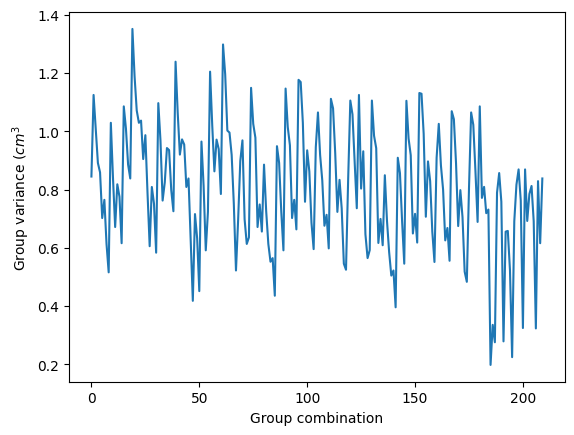

In [36]:
# Visualize the variance of all groups
plt.figure()
plt.plot(all_groups_var)
plt.xlabel('Group combination')
plt.ylabel('Group variance ($cm^3$')
plt.show()


In [47]:
# Select group with the lowest variance
idx_min = np.argmin(all_groups_var)
min_var = np.min(all_groups_var)
group_min_var = groups[idx_min]

print(f"Most uniform {k} members are:{group_min_var} with var={min_var:.1f} cm^2)")
print(f'The values of combination {idx_min} are: {obs[list(groups[idx_min])]}')

Most uniform 6 members are:(2, 3, 4, 5, 7, 8) with var=0.2 cm^2)
The values of combination 185 are: [14.  13.5 14.5 13.2 14.3 13.8]


## Practice

1. Convert the steps of the script into a function. Make sure to add a docstring and describe the inputs of the function.

2. Can you find and measure some random objects around you and find the most uniform set of `k` members of the set? You could measure height, area, volume, mass, or any other property or variable.